# Trabalho de Aprendizado de Máquina (SME0829)
nomes:
- Bruno R. Florentino (n-usp: 11836667)
- Lucas Rafael Oliveira Santos Eugênio (n-usp: 11836667)
- Lucas Schimidt Coelho (n-usp: 11913019)
- Marcos Vinicius Tomás Olegario (n-usp: 12688636)

Com o surgimento de tecnologias avançadas, como o sequenciamento de nova geração, os dados biológicos passaram a se expandir rapidamente [1]. Eventualmente, essa informação começou a ser armazenada em bancos de dados que abrangem informações genômicas, proteômicas e metabólicas de várias espécies, representando uma parcela significativa do conhecimento acumulado sobre os diversos organismos existentes [2].

Nesse contexto, têm sido desenvolvidas diversas ferramentas utilizando aprendizado de máquina (AM) na área de bioinformática, com o objetivo de extrair informações desses dados [3,4,5].

No entanto, existem vários desafios ao lidar com sequências biológicas, uma vez que elas são dados não estruturados [6]. O presente trabalho tem como objetivo apresentar algumas técnicas para estruturar esses dados, com base nos artigos de Robson et al [7, 8]. Os referidos artigos discutem várias técnicas de extração.

As extrações serão baseadas na ferramenta MathFeature, disponível no [GitHub](https://github.com/Bonidia/MathFeature) do pesquisador Robson P. Bonidia, doutorando da ICMC-USP.

In [ ]:
!pip install shap

In [ ]:
#Apenas necessário durante a produção do trabalho
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import subprocess
import os.path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn as skl
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import shap
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

Importamos os dados em FASTA, sendo esse o formato de arquivo mais comum para sequências biológicas (DNA, RNA e proteinas) e com eles que será trabalhado.
Basicamente, devemos informar a localização desses arquivos para a ferramenta extrair as características.

Os dados foram retirados da base do MathFeature e são de duas classes, promotores e não promotores sendo que promotores são sequências de DNA localizadas no início dos genes. Eles são reconhecidos por fatores de transcrição que iniciam a transcrição do DNA em RNA mensageiro (mRNA), levando à síntese de proteínas. Por isso, promotores desempenham um papel crucial no controle da expressão gênica.

In [ ]:
dna_promotor = 'CaseStudies/0dna.fasta'
dna_npromotor = 'CaseStudies/1dna.fasta'

# Utilização do MathFeature para estruturação dos dados

### NAC

Primeira característica analisada é o NAC (Nucleic Acid Composition) que é uma característica é a frequência de cada nucleotídeo na sequência.

In [ ]:
feature_paths = [] #Armazena os caminhos

#Uma das muitas caracteristicas que podemos analisar
dataset = os.path.join('NAC_DNA1.csv')
subprocess.run(['python', 'MathFeature/methods/ExtractionTechniques.py',
                '-i', dna_promotor, '-o', dataset, '-l', 'promotor', '-t', 'NAC', '-seq', '1'],
               stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
feature_paths.append(dataset)

dataset = os.path.join('NAC_DNA2.csv')
subprocess.run(['python', 'MathFeature/methods/ExtractionTechniques.py',
                '-i', dna_npromotor, '-o', dataset, '-l', 'Npromotor', '-t', 'NAC', '-seq', '1'],
               stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
feature_paths.append(dataset)
print(dataset)

NAC_DNA2.csv



Mathfeature salvou os dados, vamos ler eles de novo por classe e juntar em um único dataset.

In [ ]:
NAC1 = pd.read_csv('/content/drive/MyDrive/AM/NAC_DNA1.csv')
NAC2 = pd.read_csv('/content/drive/MyDrive/AM/NAC_DNA2.csv')
NAC = pd.concat([NAC1, NAC2])

In [ ]:
print(NAC) #vemos as frequencias de cada base

            nameseq         A         C         G         T      label
0    non-promoter-1  0.172840  0.259259  0.358025  0.209877   promotor
1    non-promoter-2  0.185185  0.246914  0.308642  0.259259   promotor
2    non-promoter-3  0.197531  0.283951  0.246914  0.271605   promotor
3    non-promoter-4  0.172840  0.222222  0.308642  0.296296   promotor
4    non-promoter-5  0.172840  0.259259  0.271605  0.296296   promotor
..              ...       ...       ...       ...       ...        ...
736    promoter-737  0.271605  0.185185  0.209877  0.333333  Npromotor
737    promoter-738  0.283951  0.185185  0.148148  0.382716  Npromotor
738    promoter-739  0.283951  0.222222  0.209877  0.283951  Npromotor
739    promoter-740  0.407407  0.135802  0.160494  0.296296  Npromotor
740    promoter-741  0.333333  0.197531  0.234568  0.234568  Npromotor

[2141 rows x 6 columns]


### Fickett

Fickett Score relaciona a frequência do nucleotídeo e também a assimetria pela distribuição de cada base nucleotídica nas posições dentro de trincas de códons em uma sequência codificante ou nos análogos de uma sequência não codificante.[9]

In [ ]:
dataset = os.path.join('Fickett_DNA1.csv')
subprocess.run(['python', 'MathFeature/methods/FickettScore.py', '-i',
                dna_promotor, '-o', dataset, '-l', 'promotor',
                '-seq', '1'], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
feature_paths.append(dataset)

dataset = os.path.join('Fickett_DNA2.csv')
subprocess.run(['python', 'MathFeature/methods/FickettScore.py', '-i',
                dna_npromotor, '-o', dataset, '-l', 'Npromotor',
                '-seq', '1'], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
feature_paths.append(dataset)

In [ ]:
FIC1 = pd.read_csv('/content/drive/MyDrive/AM/Fickett_DNA1.csv')
FIC2 = pd.read_csv('/content/drive/MyDrive/AM/Fickett_DNA2.csv')
FIC = pd.concat([FIC1, FIC2])

In [ ]:
print(FIC)

            nameseq  fickett_score-ORF  fickett_score-full-sequence      label
0    non-promoter-1             1.2864                      0.37947   promotor
1    non-promoter-2             1.0168                      0.41974   promotor
2    non-promoter-3             1.2181                      0.42131   promotor
3    non-promoter-4             1.0435                      0.45135   promotor
4    non-promoter-5             1.2552                      0.42380   promotor
..              ...                ...                          ...        ...
736    promoter-737             0.6744                      0.41732  Npromotor
737    promoter-738             0.5792                      0.36417  Npromotor
738    promoter-739             0.8297                      0.44463  Npromotor
739    promoter-740             0.8372                      0.33766  Npromotor
740    promoter-741             0.8754                      0.35046  Npromotor

[2141 rows x 4 columns]


### Shannon

A característica Shannon vem da teoria da comunicação feita por Shannon, na qual pode-se calcular a quantidade de informação e incerteza sobre ela em uma comunicação. O processo de tradução do DNA em aminoácidos pode ser interpretado da mesma forma e, assim, pode-se utilizar esse método. Na aplicação do método, a análise é feita a partir de sequências de tamanho n (daí vem k1,k2,...,k5) de uma sequência completa. [10]

In [ ]:
dataset = os.path.join('Shannon_DNA1.csv')
subprocess.run(['python', 'MathFeature/methods/EntropyClass.py', '-i',
                dna_promotor, '-o', dataset, '-l', 'promotor',
                '-k', '5', '-e', 'Shannon'],
                stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
feature_paths.append(dataset)

dataset = os.path.join('Shannon_DNA2.csv')
subprocess.run(['python', 'MathFeature/methods/EntropyClass.py', '-i',
                dna_npromotor, '-o', dataset, '-l', 'Npromotor',
                '-k', '5', '-e', 'Shannon'],
                stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
feature_paths.append(dataset)

In [ ]:
SHA1 = pd.read_csv('/content/drive/MyDrive/AM/Shannon_DNA1.csv')
SHA2 = pd.read_csv('/content/drive/MyDrive/AM/Shannon_DNA2.csv')
SHA = pd.concat([SHA1, SHA2])

In [ ]:
print(SHA)

            nameseq        k1        k2        k3        k4        k5  \
0    non-promoter-1  1.945900  3.813897  5.341260  6.028992  6.214838   
1    non-promoter-2  1.977171  3.878415  5.521826  6.080274  6.214838   
2    non-promoter-3  1.986912  3.884631  5.420560  6.054633  6.266787   
3    non-promoter-4  1.963342  3.791280  5.219619  5.916750  6.188864   
4    non-promoter-5  1.973329  3.876644  5.420560  6.028992  6.266787   
..              ...       ...       ...       ...       ...       ...   
736    promoter-737  1.962323  3.771651  5.115296  5.932713  6.214838   
737    promoter-738  1.904728  3.734952  5.026970  5.775474  6.162890   
738    promoter-739  1.986401  3.797697  5.170251  5.875146  6.058994   
739    promoter-740  1.862522  3.591749  4.979688  5.846112  6.136916   
740    promoter-741  1.971909  3.757246  5.051960  5.794830  6.136916   

         label  
0     promotor  
1     promotor  
2     promotor  
3     promotor  
4     promotor  
..         ...  
736 

# **Preparação dos Dados**

Após a estruturação dos dados, uma importante etapa do Aprendizado de Máquina é a preparação dos dados. Nessa parte do projeto, exploramos o dataset a fim de encontrar relações entre os atributos, corrigir informações faltantes ou excluir colunas irrelevantes para o nosso modelo, dentre outras tarefas que foram descritas abaixo.

Em nosso trabalho, trabalhamos com três tipos de estruturação de dados de sequências biológicas, obtendo três base de dados com informações acerca dos atributos e variáveis resposta indicando se a sequência se refere a um DNA "promotor" ou "não-promotor". Em nosso pré-processamento, realizamos as etapas para cada tipo de estruturação.



> # **NAC**



**Análise Exploratória**

In [ ]:
# Visualizando o dataset gerado a partir da padronização:

print("Número de linhas e colunas:", NAC.shape, "\n")
NAC.head(5)

Número de linhas e colunas: (2141, 6) 



,nameseq,A,C,G,T,label
0,non-promoter-1,0.172840,0.259259,0.358025,0.209877,promotor
1,non-promoter-2,0.185185,0.246914,0.308642,0.259259,promotor
2,non-promoter-3,0.197531,0.283951,0.246914,0.271605,promotor
3,non-promoter-4,0.172840,0.222222,0.308642,0.296296,promotor
4,non-promoter-5,0.172840,0.259259,0.271605,0.296296,promotor


In [ ]:
# Algumas informações sobre o dataset
NAC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nameseq  2141 non-null   object 
 1   A        2141 non-null   float64
 2   C        2141 non-null   float64
 3   G        2141 non-null   float64
 4   T        2141 non-null   float64
 5   label    2141 non-null   object 
dtypes: float64(4), object(2)
memory usage: 117.1+ KB


**Remoção de atributos irrelevantes**

De inicio, vemos que a coluna "nameseq" é apenas categórica e não irá contribuir para o nosso ajuste de modelo.

In [ ]:
NAC.drop(['nameseq'], axis = 1, inplace = True)
NAC.head()

,A,C,G,T,label
0,0.172840,0.259259,0.358025,0.209877,promotor
1,0.185185,0.246914,0.308642,0.259259,promotor
2,0.197531,0.283951,0.246914,0.271605,promotor
3,0.172840,0.222222,0.308642,0.296296,promotor
4,0.172840,0.259259,0.271605,0.296296,promotor


**Verificação de dados faltantes**

In [ ]:
NAC.isnull().sum().sort_values(ascending=False).head(10)

A        0
C        0
G        0
T        0
label    0
dtype: int64

In [ ]:
NAC.isna().sum()

A        0
C        0
G        0
T        0
label    0
dtype: int64

Vemos que não há dados faltantes, portanto não precisaremos de uma etapa de correção dos dados ausentes.

**Análise descritiva**

In [ ]:
# Análise das informações referentes as variáveis numéricas:
NAC.describe()

,A,C,G,T
count,2141.000000,2141.000000,2141.000000,2141.000000
mean,0.262650,0.230970,0.236459,0.269921
std,0.067613,0.057877,0.061432,0.066959
min,0.074074,0.061728,0.037037,0.074074
25%,0.209877,0.197531,0.197531,0.222222
50%,0.259259,0.234568,0.234568,0.271605
75%,0.308642,0.271605,0.271605,0.320988
max,0.518519,0.419753,0.432099,0.518519


In [ ]:
# Agrupando os dados por label, temos:
NAC.groupby('label').describe().transpose()

label     Npromotor     promotor
A count  741.000000  1400.000000
  mean     0.289232     0.248580
  std      0.061487     0.066489
  min      0.111111     0.074074
  25%      0.246914     0.197531
  50%      0.283951     0.246914
  75%      0.333333     0.296296
  max      0.518519     0.518519
C count  741.000000  1400.000000
  mean     0.205695     0.244347
  std      0.051442     0.056628
  min      0.074074     0.061728
  25%      0.172840     0.209877
  50%      0.209877     0.246914
  75%      0.246914     0.283951
  max      0.407407     0.419753
G count  741.000000  1400.000000
  mean     0.200263     0.255617
  std      0.052582     0.057001
  min      0.037037     0.086420
  25%      0.160494     0.222222
  50%      0.197531     0.259259
  75%      0.234568     0.296296
  max      0.382716     0.432099
T count  741.000000  1400.000000
  mean     0.304810     0.251455
  std      0.062834     0.061513
  min      0.111111     0.074074
  25%      0.259259     0.209877
  50%      0.308642     0.246914
  75%      0.345679     0.296296
  max      0.518519     0.456790

Podemos analisar as variáveis individualmente ou sua relação, de modo a entender melhor os dados.

Inicialmente, vamos realizar uma Visualização de dados, começando pela matriz de dispersão e densidades alisadas.

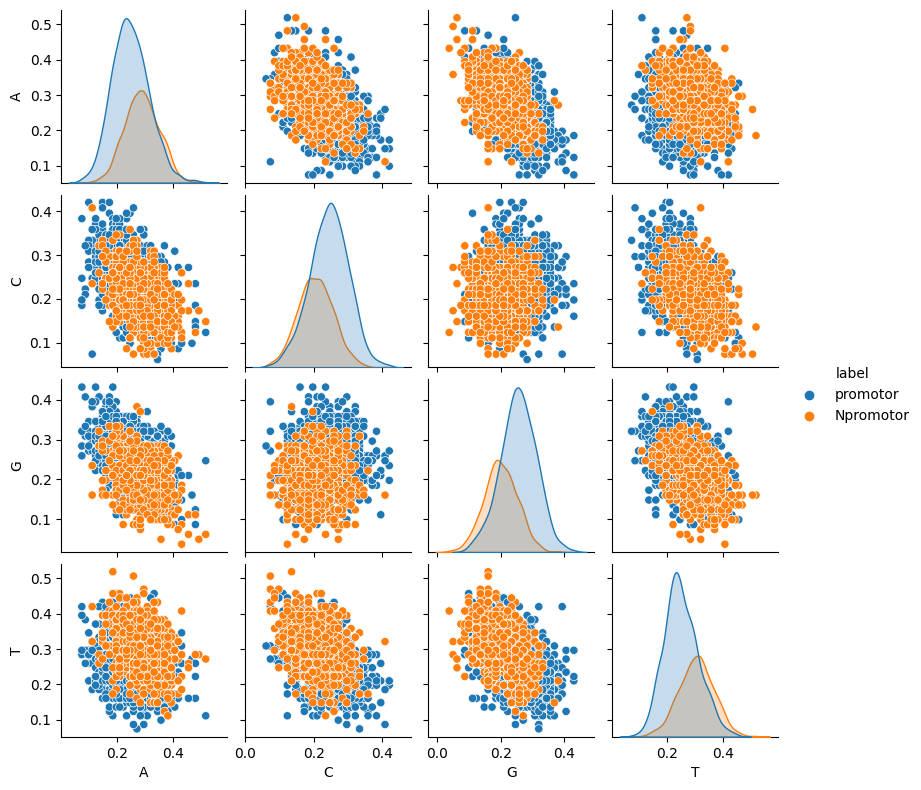

In [ ]:
sns.pairplot(NAC,  hue='label', height=2)

Vemos uma baixa separação espacial das características em duas dimensões o que pode indicar que será necessário utilizar não apenas uma ou duas delas para classificar corretamente os dados

Vamos olhar para a correlação desse conjunto de dados

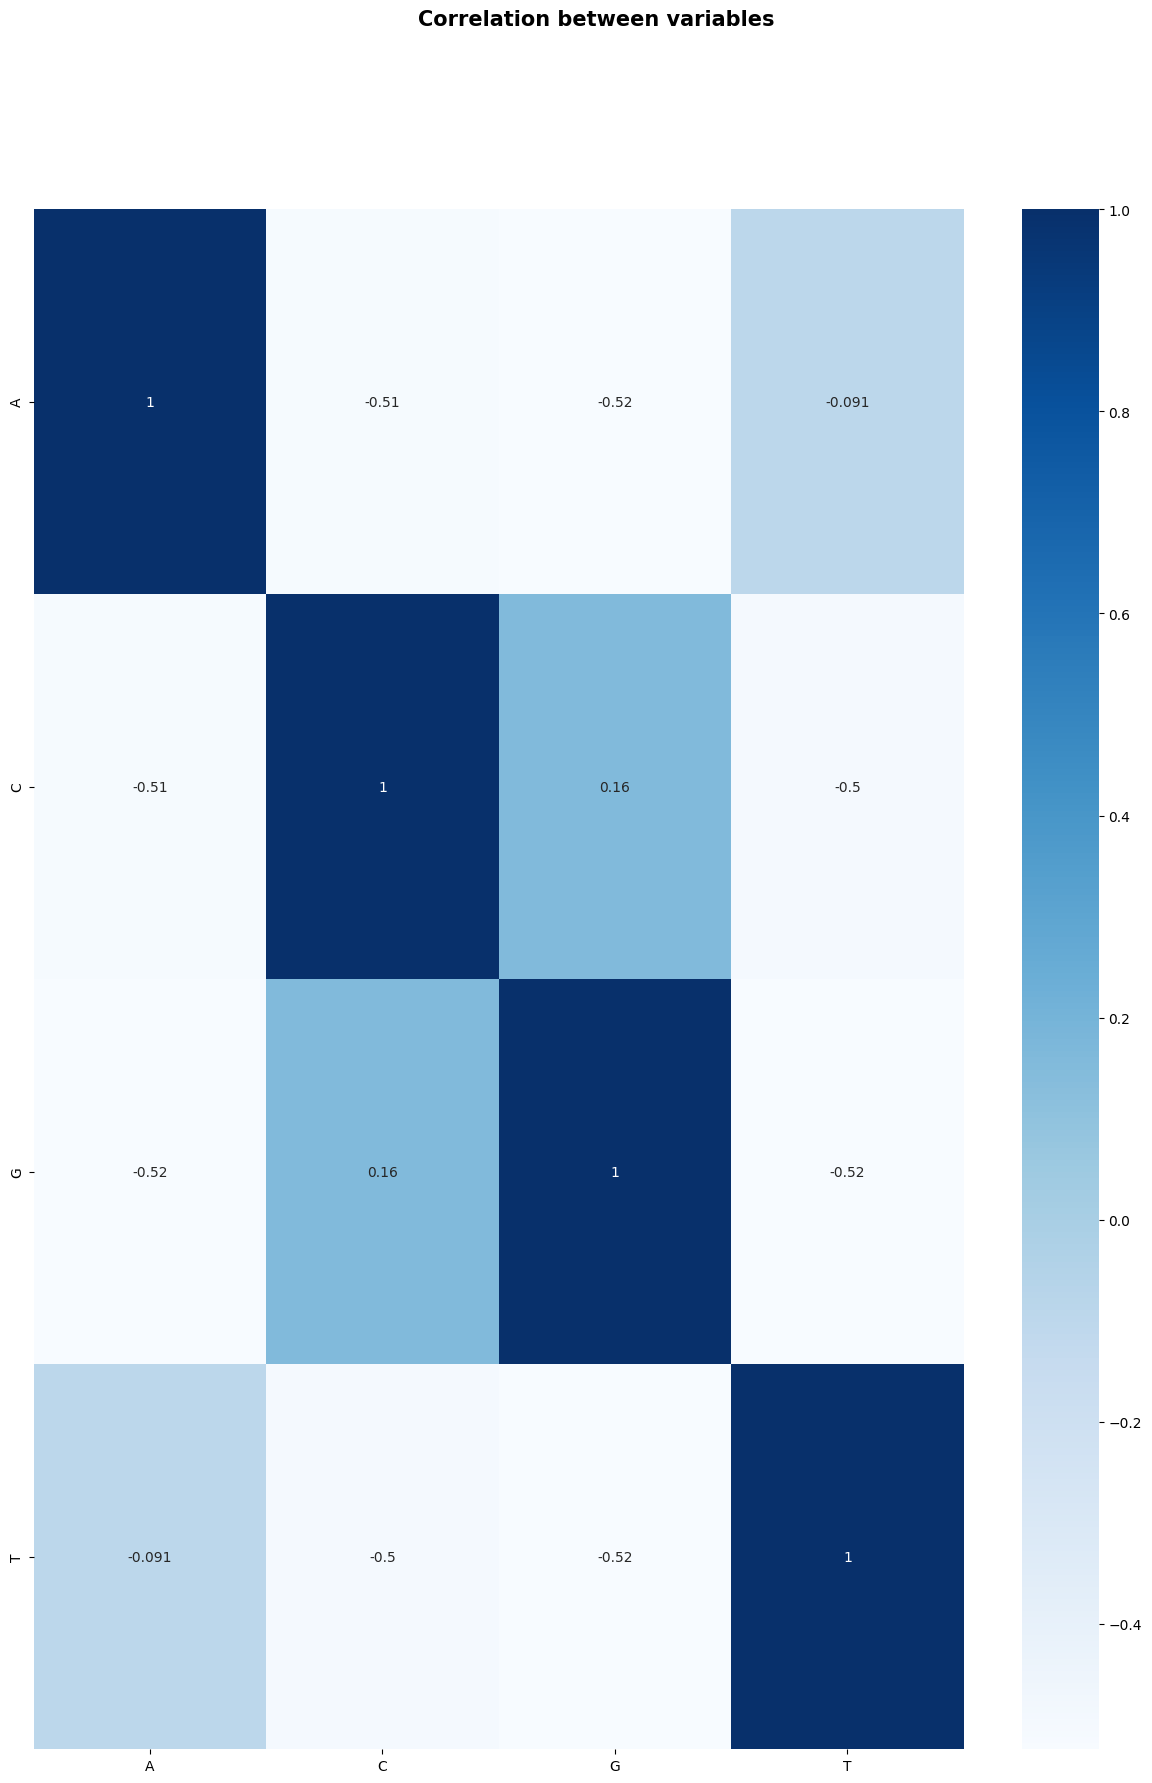

In [ ]:
corr_matrix = NAC[['A', 'C', 'G', 'T']].corr()

# Plotando um mapa de calor com as correlações
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.show()

Vemos uma alta correlação entre os dados, algo esperado uma vez que para aumentar a frequência de uma característica é necessário que as demais diminuam, o que já indica um problema dessa abordagem.

Vamos agora visualizar a distribuição dos atributos.

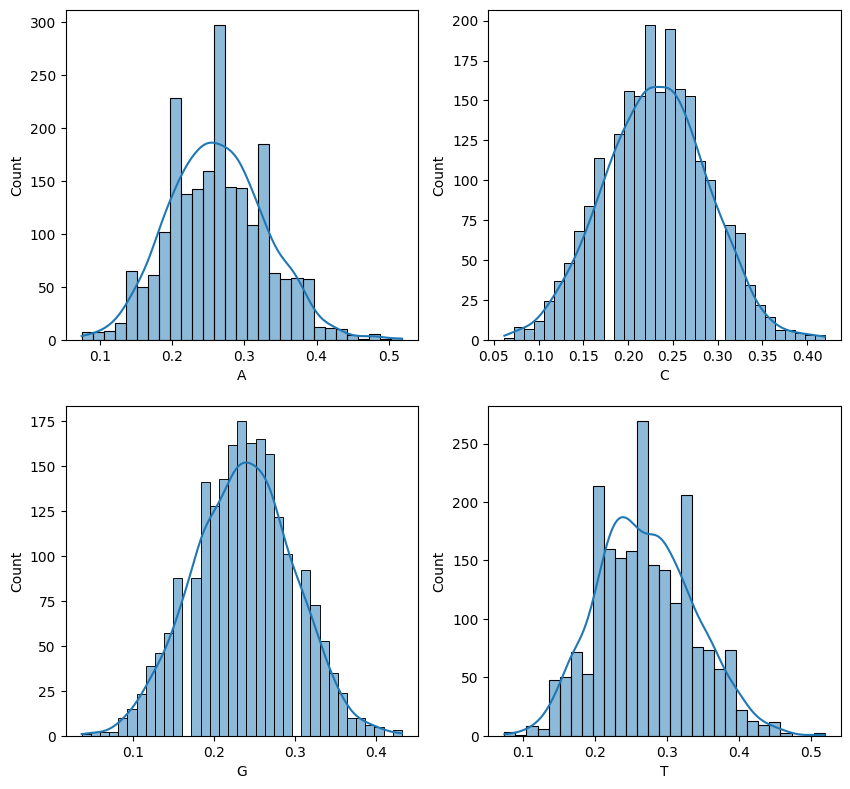

In [ ]:
plt.figure(figsize=(10,30))

for i in range(len(NAC.columns)-1):
    plt.subplot(6,2, i+1)
    sns.histplot(NAC[NAC.columns[i]], kde=True)

Outro ponto relevante de se observar é o balanceamento das variáveis resposta.

Número de não promotores e promotores: [ 741. 1400.] 



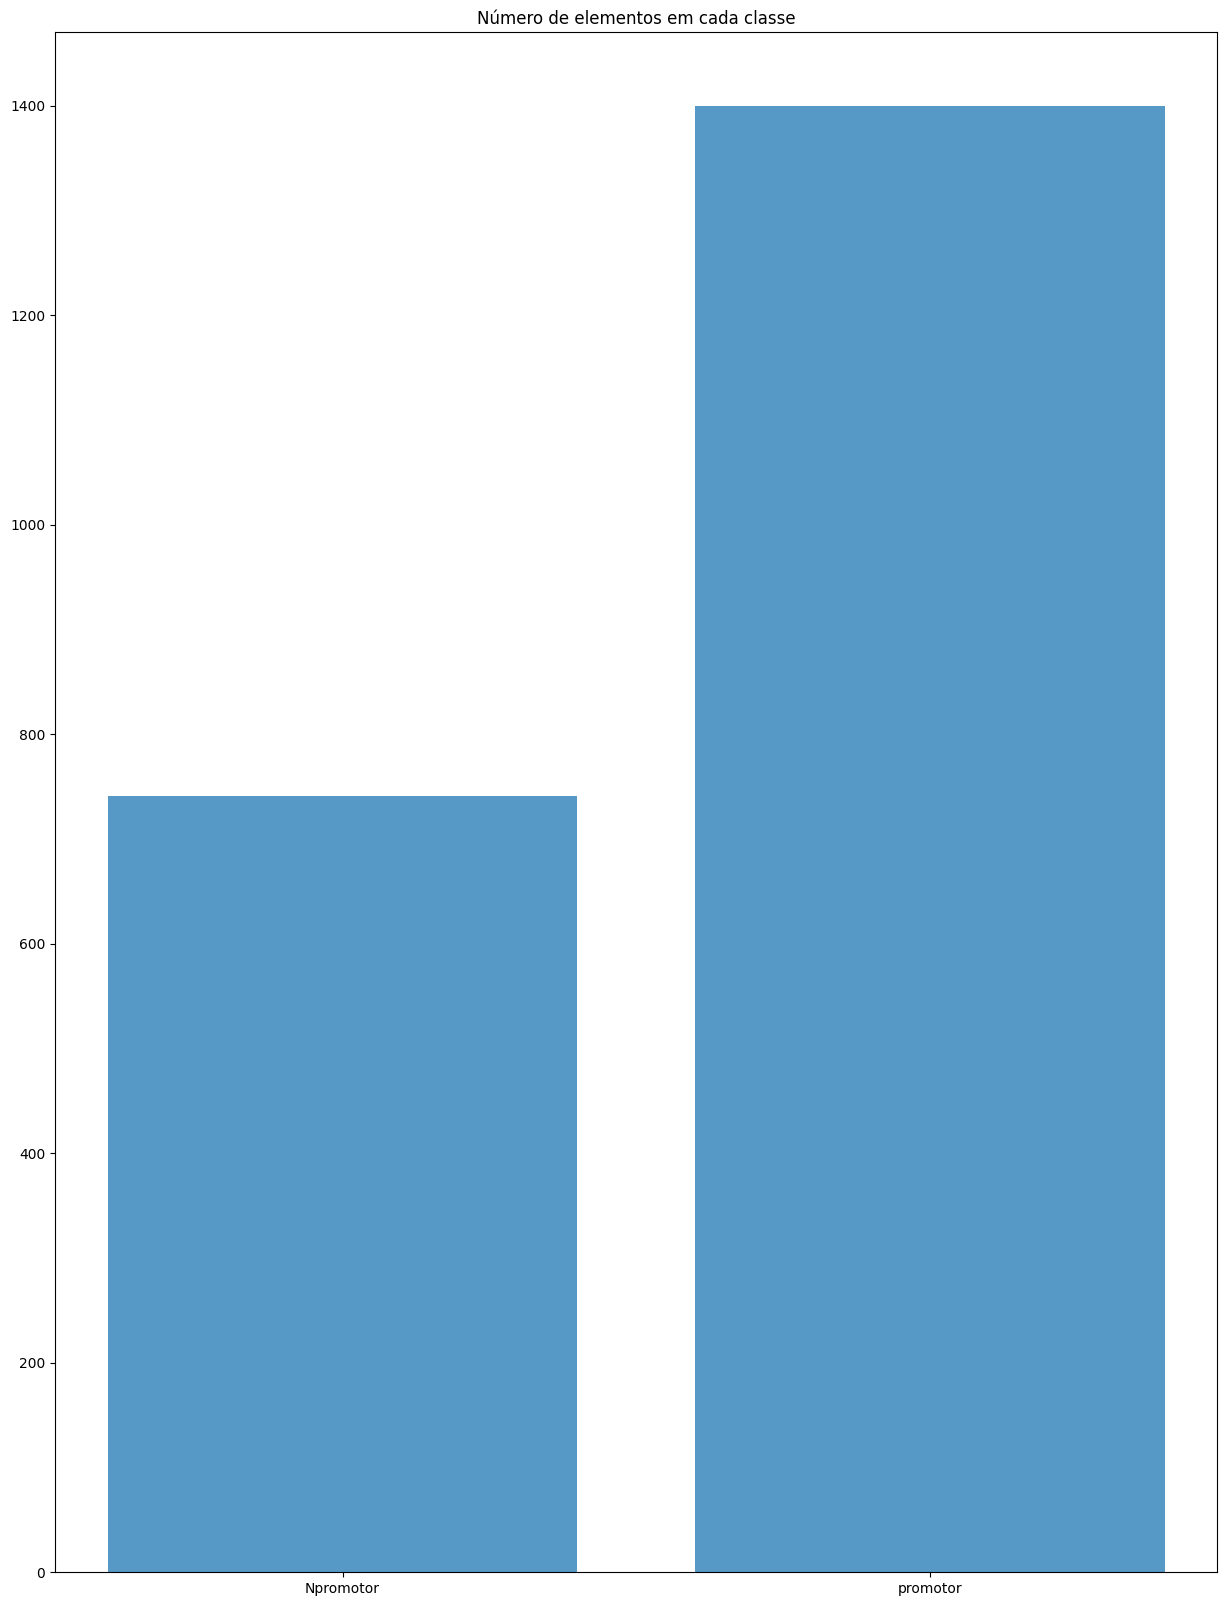

In [ ]:
classes = NAC[NAC.columns[-1]]
#classes = y_train
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])

numbers = np.arange(0, len(cl))

print("Número de não promotores e promotores:", ncl, "\n")

plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Essa informação será importante na validação cruzada.

Por fim, vamos realizar a codificação das variáveis categóricas para numéricas e identificar e corrigir possíveis outliers.

In [ ]:
# replacing values
NAC['label'].replace(['Npromotor', 'promotor'], [0, 1], inplace=True)

NAC

,A,C,G,T,label
0,0.172840,0.259259,0.358025,0.209877,1
1,0.185185,0.246914,0.308642,0.259259,1
2,0.197531,0.283951,0.246914,0.271605,1
3,0.172840,0.222222,0.308642,0.296296,1
4,0.172840,0.259259,0.271605,0.296296,1
...,...,...,...,...,...
736,0.271605,0.185185,0.209877,0.333333,0
737,0.283951,0.185185,0.148148,0.382716,0
738,0.283951,0.222222,0.209877,0.283951,0
739,0.407407,0.135802,0.160494,0.296296,0


**Detecção de Ouliers**

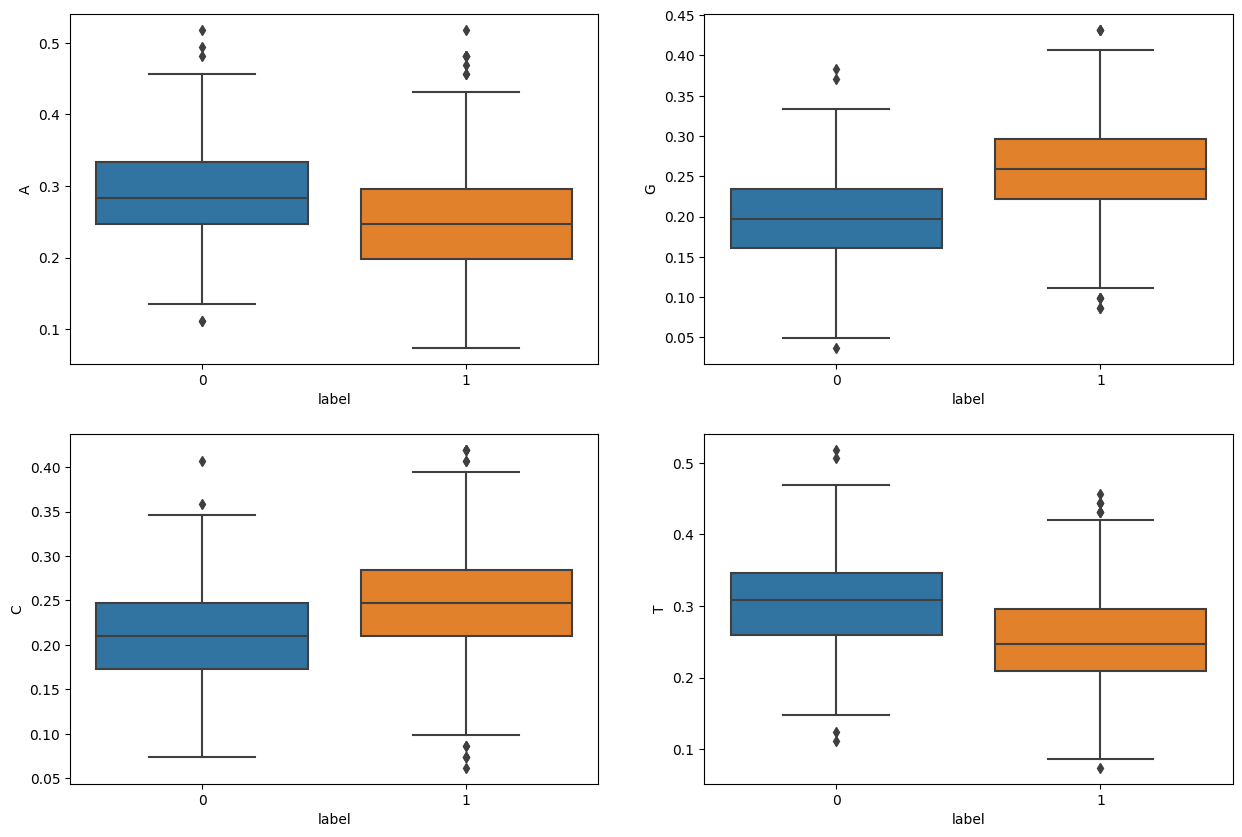

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

fig, axes = plt.subplots(2, 2)
sns.boxplot(data=NAC, y='A', x='label', ax=axes[0,0])
sns.boxplot(data=NAC, y='C', x='label', ax=axes[1,0])
sns.boxplot(data=NAC, y='G', x='label', ax=axes[0,1])
sns.boxplot(data=NAC, y='T', x='label', ax=axes[1,1])
plt.show()

In [ ]:
# Entendendo o quanto de cada atributo corresponde a outliers
column_name = NAC.columns

print("Porcentagem de Outlier's:\n")

for i in range(len(column_name)-1):
    Q1 = NAC[column_name[i]].quantile(0.25)
    Q3 = NAC[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Matrizes booleanas indicando as linhas com outliers
    upper_array = np.where(NAC[column_name[i]]>=upper)[0]
    lower_array = np.where(NAC[column_name[i]]<=lower)[0]

    print(column_name[i] + ": ", (len(upper_array) + len(lower_array))/len(NAC) * 100)

Porcentagem de Outlier's:

A:  0.6071929005137786
C:  0.8874357776739842
G:  0.9808500700607193
T:  0.2335357309668379


In [ ]:
# Função para substituir os Outlier's pela média dos valores
def impute_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   upper = data[~(data>(q3+1.5*IQR))].max()
   lower = data[~(data<(q1-1.5*IQR))].min()
   data = np.where(data > upper,data.mean(),np.where(data < lower,data.mean(),data))
   return data

NAC = pd.DataFrame(impute_outliers_IQR(NAC), columns = column_name)

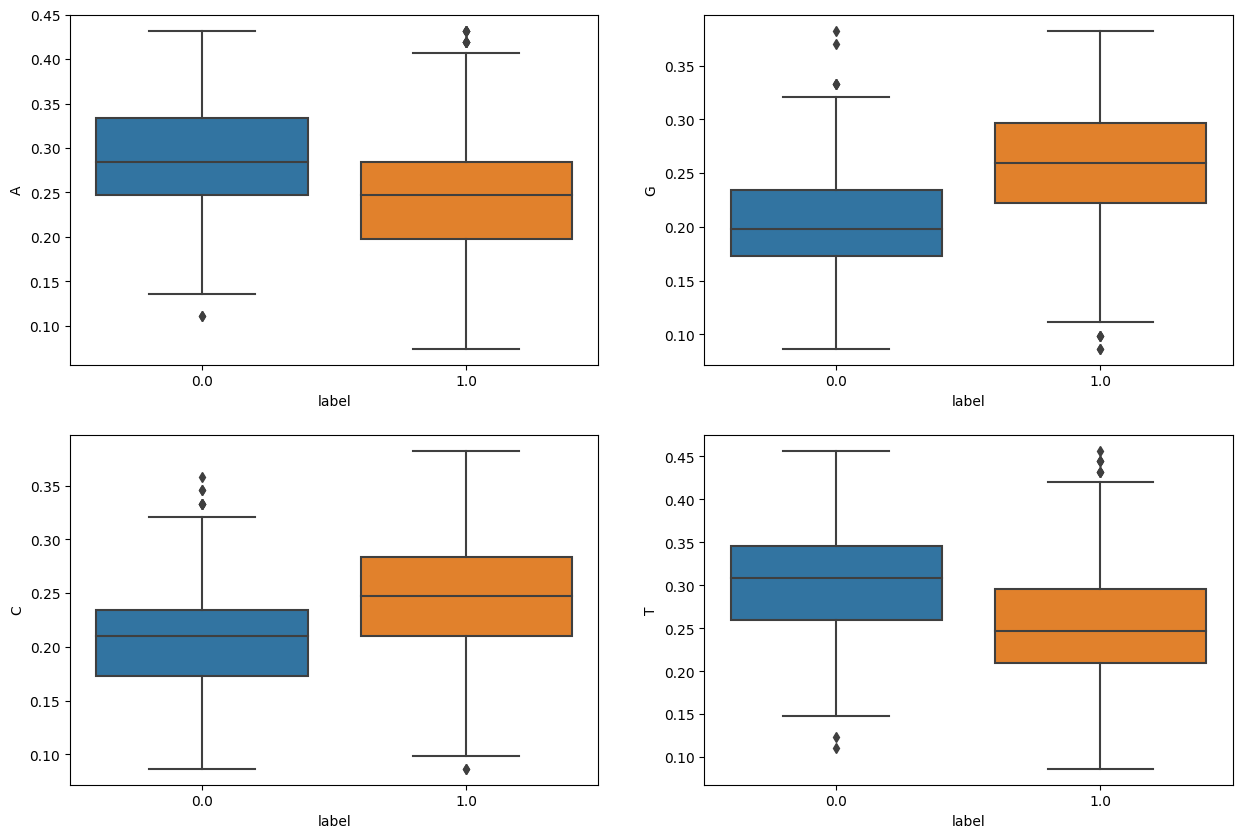

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

fig, axes = plt.subplots(2, 2)
sns.boxplot(data=NAC, y='A', x='label', ax=axes[0,0])
sns.boxplot(data=NAC, y='C', x='label', ax=axes[1,0])
sns.boxplot(data=NAC, y='G', x='label', ax=axes[0,1])
sns.boxplot(data=NAC, y='T', x='label', ax=axes[1,1])
plt.show()


> #  **Fickett**







Após feita a análise e pré-processamento dos dados para o primeiro modelo de estruturação, NAC, antes de partimos para a aplicação dos modelos de classificação, vamos realizar os mesmos procedimentos para as demais caracteríticas, sem tantos detalhes diferentemente de como descrito acima para o primeiro estruturador.

**Análise exploratória**

In [ ]:
# Visualizando o dataset gerado:

print("Número de linhas e colunas:", FIC.shape, "\n")
FIC.head(5)

Número de linhas e colunas: (2141, 4) 



,nameseq,fickett_score-ORF,fickett_score-full-sequence,label
0,non-promoter-1,1.2864,0.37947,promotor
1,non-promoter-2,1.0168,0.41974,promotor
2,non-promoter-3,1.2181,0.42131,promotor
3,non-promoter-4,1.0435,0.45135,promotor
4,non-promoter-5,1.2552,0.42380,promotor


In [ ]:
# Algumas informações sobre o dataset
FIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 740
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nameseq                      2141 non-null   object 
 1   fickett_score-ORF            2141 non-null   float64
 2   fickett_score-full-sequence  2141 non-null   float64
 3   label                        2141 non-null   object 
dtypes: float64(2), object(2)
memory usage: 83.6+ KB


**Remoção de atributos irrelevantes**

In [ ]:
FIC.drop(['nameseq'], axis = 1, inplace = True)
FIC.head()

,fickett_score-ORF,fickett_score-full-sequence,label
0,1.2864,0.37947,promotor
1,1.0168,0.41974,promotor
2,1.2181,0.42131,promotor
3,1.0435,0.45135,promotor
4,1.2552,0.42380,promotor


Porque retiramos o nome?
Simplificar o modelo: Em alguns casos, os nomes das features podem ser longos,
complexos ou pouco descritivos. Removê-los pode simplificar o modelo, reduzir a
dimensionalidade dos dados e facilitar a interpretação dos resultados.

**Verificação de dados faltantes**

In [ ]:
FIC.isnull().sum().sort_values(ascending=False).head(10)

fickett_score-ORF              0
fickett_score-full-sequence    0
label                          0
dtype: int64

In [ ]:
FIC.isna().sum()

fickett_score-ORF              0
fickett_score-full-sequence    0
label                          0
dtype: int64

Para este dataset também não há dados faltantes, portanto não precisaremos de uma etapa de correção dos dados ausentes.

**Análise descritiva**

In [ ]:
# Análise das informações referentes as variáveis numéricas:
FIC.describe()

,fickett_score-ORF,fickett_score-full-sequence
count,2141.000000,2141.000000
mean,0.893694,0.401673
std,0.218642,0.044649
min,0.326200,0.217040
25%,0.734100,0.374590
50%,0.899300,0.409860
75%,1.058300,0.434430
max,1.341000,0.499350


In [ ]:
# Agrupando os dados por label, temos:
FIC.groupby('label').describe().transpose()

label                               Npromotor     promotor
fickett_score-ORF           count  741.000000  1400.000000
                            mean     0.791922     0.947560
                            std      0.196229     0.210635
                            min      0.332200     0.326200
                            25%      0.651900     0.790900
                            50%      0.795300     0.962350
                            75%      0.923400     1.114775
                            max      1.320100     1.341000
fickett_score-full-sequence count  741.000000  1400.000000
                            mean     0.391854     0.406870
                            std      0.047834     0.041965
                            min      0.236300     0.217040
                            25%      0.360180     0.382727
                            50%      0.397820     0.415220
                            75%      0.428200     0.436640
                            max      0.499350     0.493450

**Visualização dos Dados**

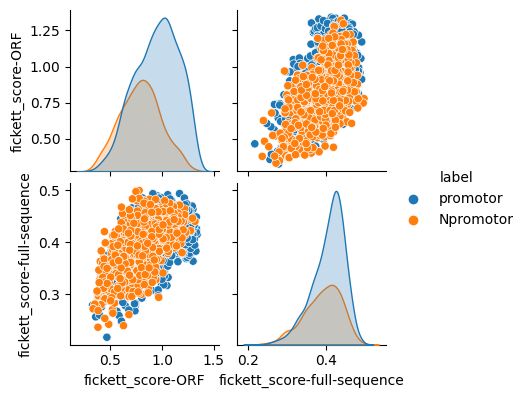

In [ ]:
sns.pairplot(FIC,  hue='label', height=2)

Novamente, vemos uma baixa separação espacial das características em duas dimensões.

Vamos olhar para a correlação desse conjunto de dados

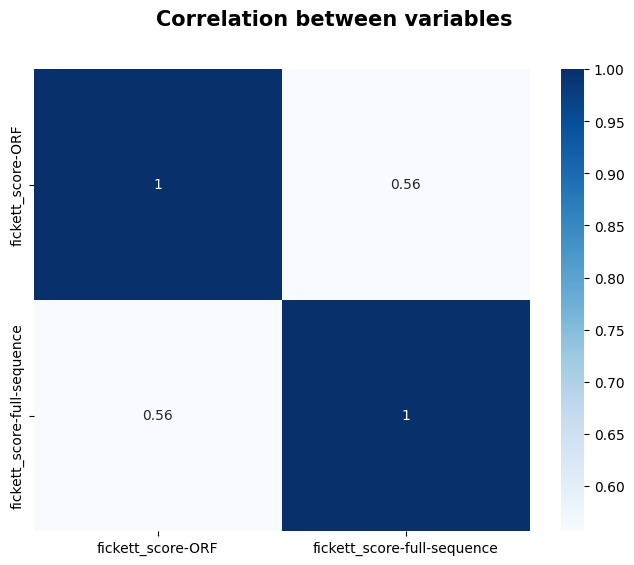

In [ ]:
plt.figure(figsize=(8,6))

corr_matrix = FIC[['fickett_score-ORF', 'fickett_score-full-sequence']].corr()

# Plotando um mapa de calor com as correlações
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.show()

Um valor de correlação de 0,56 indica uma correlação positiva moderada

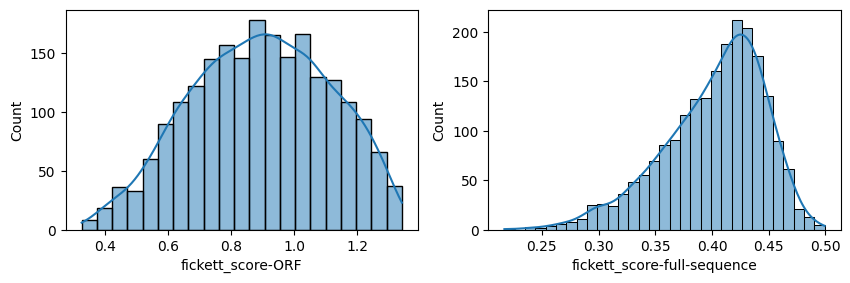

In [ ]:
# Distribuição dos atributos:

plt.figure(figsize=(10,20))

for i in range(len(FIC.columns)-1):
    plt.subplot(6,2, i+1)
    sns.histplot(FIC[FIC.columns[i]], kde=True)

A respeito do balanceamento das variáveis resposta, ele será o mesmo mostrado na sessão anterior.

In [ ]:
# Codificação das variáveis categóricas
FIC['label'].replace(['Npromotor', 'promotor'], [0, 1], inplace=True)

FIC

,fickett_score-ORF,fickett_score-full-sequence,label
0,1.2864,0.37947,1
1,1.0168,0.41974,1
2,1.2181,0.42131,1
3,1.0435,0.45135,1
4,1.2552,0.42380,1
...,...,...,...
736,0.6744,0.41732,0
737,0.5792,0.36417,0
738,0.8297,0.44463,0
739,0.8372,0.33766,0


**Detecção de Ouliers**

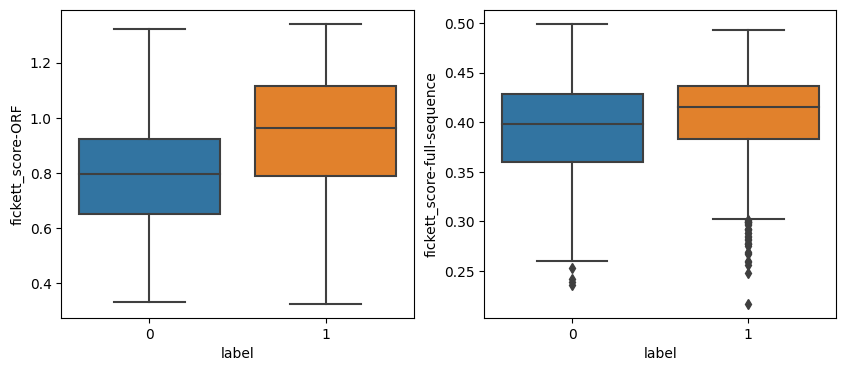

In [ ]:
plt.rcParams["figure.figsize"] = (10,4)

fig, axes = plt.subplots(1, 2)
sns.boxplot(data=FIC, y='fickett_score-ORF', x='label', ax=axes[0])
sns.boxplot(data=FIC, y='fickett_score-full-sequence', x='label', ax=axes[1])
plt.show()

Podemos ver que o fickett_score_full_sequence apresenta alguns valores para fora
da caixa dos quartils, assim vamos substituir esses valores pela média aritmética.

In [ ]:
# Entendendo o quanto de cada atributo corresponde a outliers
column_name = FIC.columns

print("Porcentagem de Outlier's:\n")

for i in range(len(column_name)-1):
    Q1 = FIC[column_name[i]].quantile(0.25)
    Q3 = FIC[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Matrizes booleanas indicando as linhas com outliers
    upper_array = np.where(FIC[column_name[i]]>=upper)[0]
    lower_array = np.where(FIC[column_name[i]]<=lower)[0]

    print(column_name[i] + ": ", (len(upper_array) + len(lower_array))/len(FIC) * 100)

Porcentagem de Outlier's:

fickett_score-ORF:  0.0
fickett_score-full-sequence:  1.35450723960766


In [ ]:
# Substituindo os Outlier's pela média dos valores
FIC = pd.DataFrame(impute_outliers_IQR(FIC), columns = column_name)

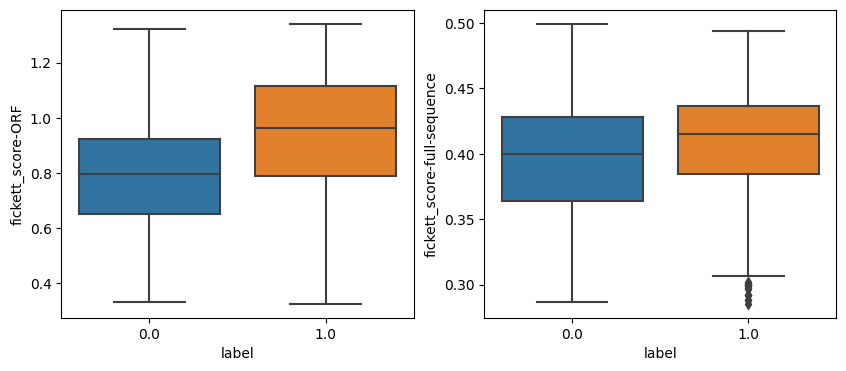

In [ ]:
plt.rcParams["figure.figsize"] = (10,4)

fig, axes = plt.subplots(1, 2)
sns.boxplot(data=FIC, y='fickett_score-ORF', x='label', ax=axes[0])
sns.boxplot(data=FIC, y='fickett_score-full-sequence', x='label', ax=axes[1])
plt.show()


> # **Shannon**



**Análise Exploratória**

In [ ]:
# Visualizando o dataset gerado:

print("Número de linhas e colunas:", SHA.shape, "\n")
SHA.head(5)

Número de linhas e colunas: (2141, 7) 



,nameseq,k1,k2,k3,k4,k5,label
0,non-promoter-1,1.945900,3.813897,5.341260,6.028992,6.214838,promotor
1,non-promoter-2,1.977171,3.878415,5.521826,6.080274,6.214838,promotor
2,non-promoter-3,1.986912,3.884631,5.420560,6.054633,6.266787,promotor
3,non-promoter-4,1.963342,3.791280,5.219619,5.916750,6.188864,promotor
4,non-promoter-5,1.973329,3.876644,5.420560,6.028992,6.266787,promotor


In [ ]:
# Algumas informações sobre o dataset
SHA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 740
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nameseq  2141 non-null   object 
 1   k1       2141 non-null   float64
 2   k2       2141 non-null   float64
 3   k3       2141 non-null   float64
 4   k4       2141 non-null   float64
 5   k5       2141 non-null   float64
 6   label    2141 non-null   object 
dtypes: float64(5), object(2)
memory usage: 133.8+ KB


**Remoção de atributos irrelevantes**

In [ ]:
SHA.drop(['nameseq'], axis = 1, inplace = True)
SHA.head()

,k1,k2,k3,k4,k5,label
0,1.945900,3.813897,5.341260,6.028992,6.214838,promotor
1,1.977171,3.878415,5.521826,6.080274,6.214838,promotor
2,1.986912,3.884631,5.420560,6.054633,6.266787,promotor
3,1.963342,3.791280,5.219619,5.916750,6.188864,promotor
4,1.973329,3.876644,5.420560,6.028992,6.266787,promotor


**Verificação de dados faltantes**

In [ ]:
SHA.isnull().sum().sort_values(ascending=False).head(10)

k1       0
k2       0
k3       0
k4       0
k5       0
label    0
dtype: int64

In [ ]:
SHA.isna().sum()

k1       0
k2       0
k3       0
k4       0
k5       0
label    0
dtype: int64

**Análise Descritiva**

In [ ]:
# Análise das informações referentes as variáveis numéricas:
SHA.describe()

,k1,k2,k3,k4,k5
count,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000
mean,1.949211,3.791888,5.220848,5.919054,6.153632
std,0.045912,0.105054,0.162492,0.138325,0.092519
min,1.599553,3.023075,4.212371,4.791231,5.045500
25%,1.931614,3.745314,5.132523,5.846112,6.110942
50%,1.962323,3.810589,5.237466,5.942391,6.162890
75%,1.981261,3.865791,5.335055,6.009636,6.214838
max,1.999673,3.963986,5.626442,6.234120,6.266787


In [ ]:
# Agrupando os dados por label, temos:
SHA.groupby('label').describe().transpose()

label      Npromotor     promotor
k1 count  741.000000  1400.000000
   mean     1.935042     1.956711
   std      0.053107     0.039622
   min      1.599553     1.685371
   25%      1.910358     1.941719
   50%      1.946297     1.967604
   75%      1.974107     1.983588
   max      1.999673     1.999673
k2 count  741.000000  1400.000000
   mean     3.764222     3.806531
   std      0.119566     0.093274
   min      3.023075     3.159209
   25%      3.702692     3.765047
   50%      3.785678     3.821562
   75%      3.851642     3.872314
   max      3.960966     3.963986
k3 count  741.000000  1400.000000
   mean     5.195409     5.234313
   std      0.176497     0.152928
   min      4.223191     4.212371
   25%      5.099243     5.152512
   50%      5.212150     5.249550
   75%      5.325500     5.341260
   max      5.597775     5.626442
k4 count  741.000000  1400.000000
   mean     5.908614     5.924580
   std      0.140459     0.136910
   min      5.076676     4.791231
   25%      5.830149     5.855790
   50%      5.932713     5.942391
   75%      6.003351     6.019314
   max      6.234120     6.234120
k5 count  741.000000  1400.000000
   mean     6.151778     6.154613
   std      0.082670     0.097344
   min      5.727699     5.045500
   25%      6.110942     6.110942
   50%      6.162890     6.162890
   75%      6.214838     6.214838
   max      6.266787     6.266787

**Visualização dos Dados**

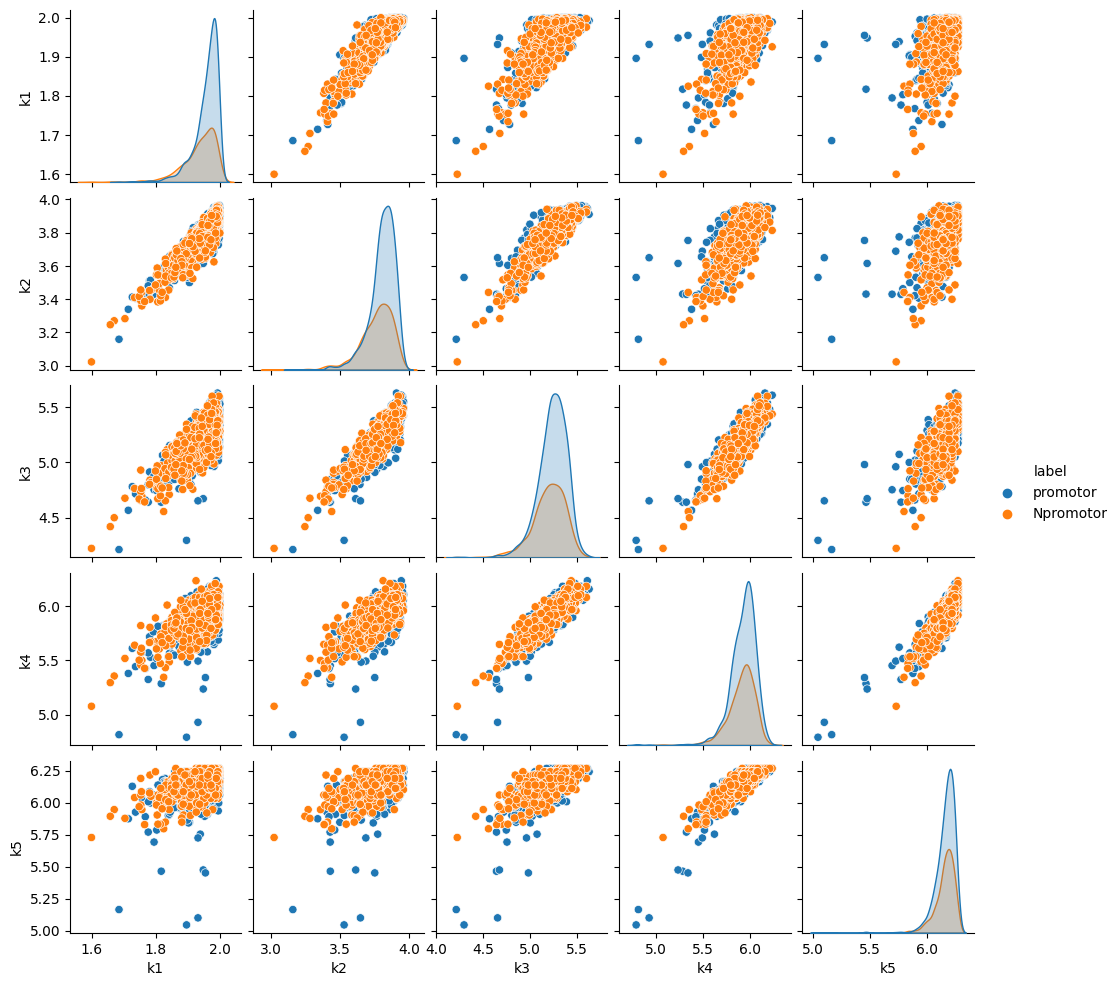

In [ ]:
sns.pairplot(SHA,  hue='label', height=2)

Podemos ver que com as métricas de fickett como eixos quase não ocorre
separação, elas praticamente se sobrepõe no gráfico. Apesar de em sua maioria
sempre ter alguns pontos distantes.

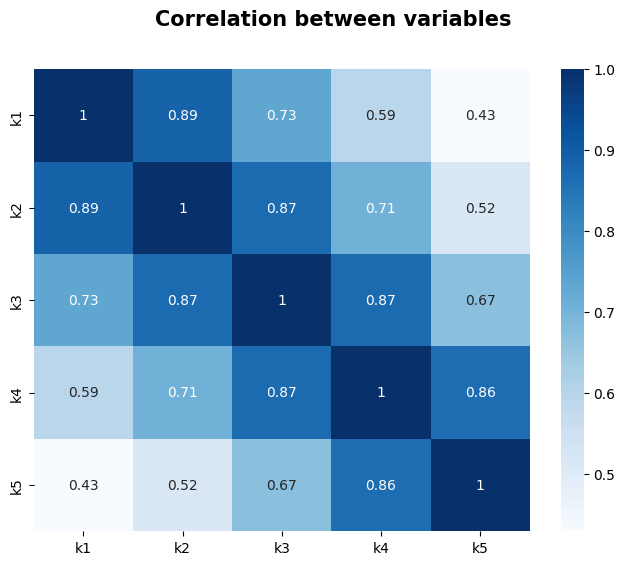

In [ ]:
plt.figure(figsize=(8,6))

corr_matrix = SHA[['k1', 'k2', 'k3', 'k4', 'k5']].corr()

# Plotando um mapa de calor com as correlações
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.show()

Tem correlação forte apenas com os K subsequentes, o quanto mais distante o K
menor a correlação.

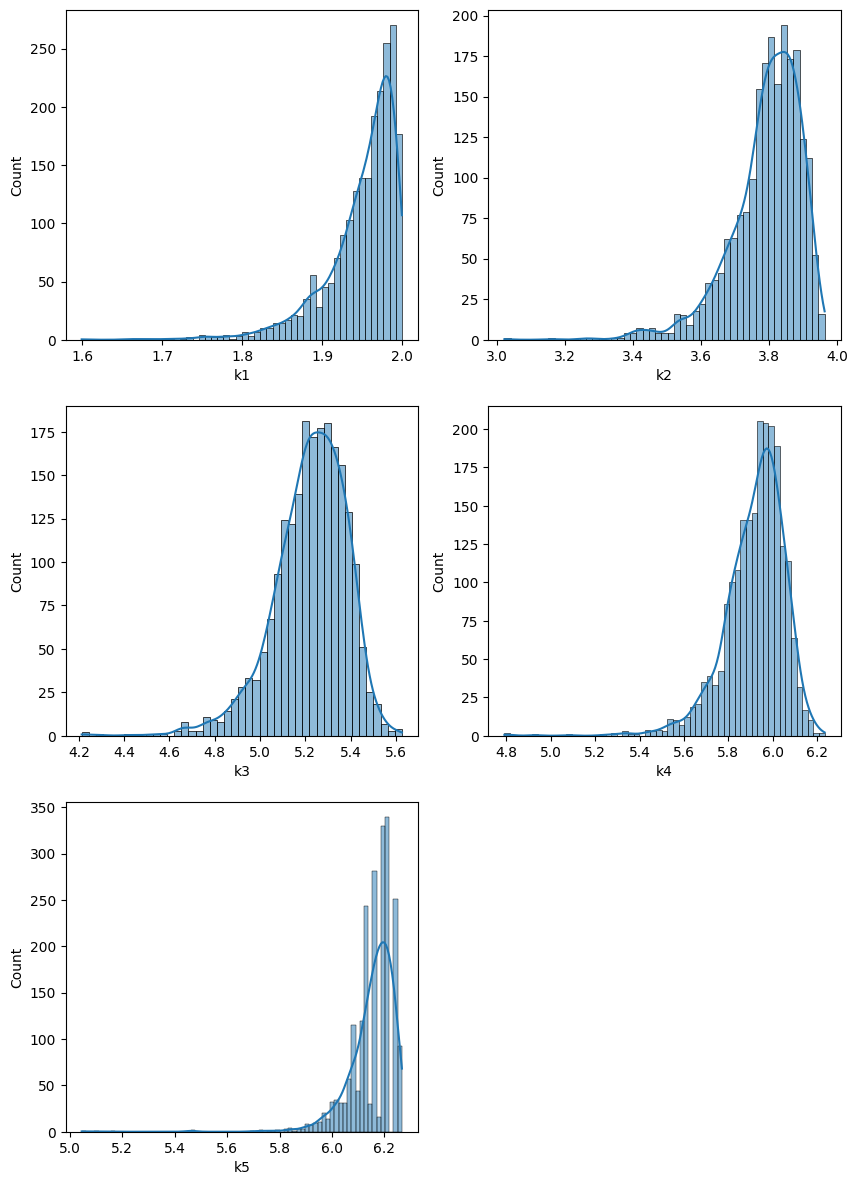

In [ ]:
# Distribuição dos atributos
plt.figure(figsize=(10,30))

for i in range(len(SHA.columns)-1):
    plt.subplot(6,2, i+1)
    sns.histplot(SHA[SHA.columns[i]], kde=True)

O k1, k2, k3, k4 seguem uma distribuição com ajuste aceitável porém o k5 se
apresenta extremamente desbalanceado.

In [ ]:
# Codificação das variáveis categóricas
SHA['label'].replace(['Npromotor', 'promotor'], [0, 1], inplace=True)

SHA

,k1,k2,k3,k4,k5,label
0,1.945900,3.813897,5.341260,6.028992,6.214838,1
1,1.977171,3.878415,5.521826,6.080274,6.214838,1
2,1.986912,3.884631,5.420560,6.054633,6.266787,1
3,1.963342,3.791280,5.219619,5.916750,6.188864,1
4,1.973329,3.876644,5.420560,6.028992,6.266787,1
...,...,...,...,...,...,...
736,1.962323,3.771651,5.115296,5.932713,6.214838,0
737,1.904728,3.734952,5.026970,5.775474,6.162890,0
738,1.986401,3.797697,5.170251,5.875146,6.058994,0
739,1.862522,3.591749,4.979688,5.846112,6.136916,0


**Detecção de Outliers**

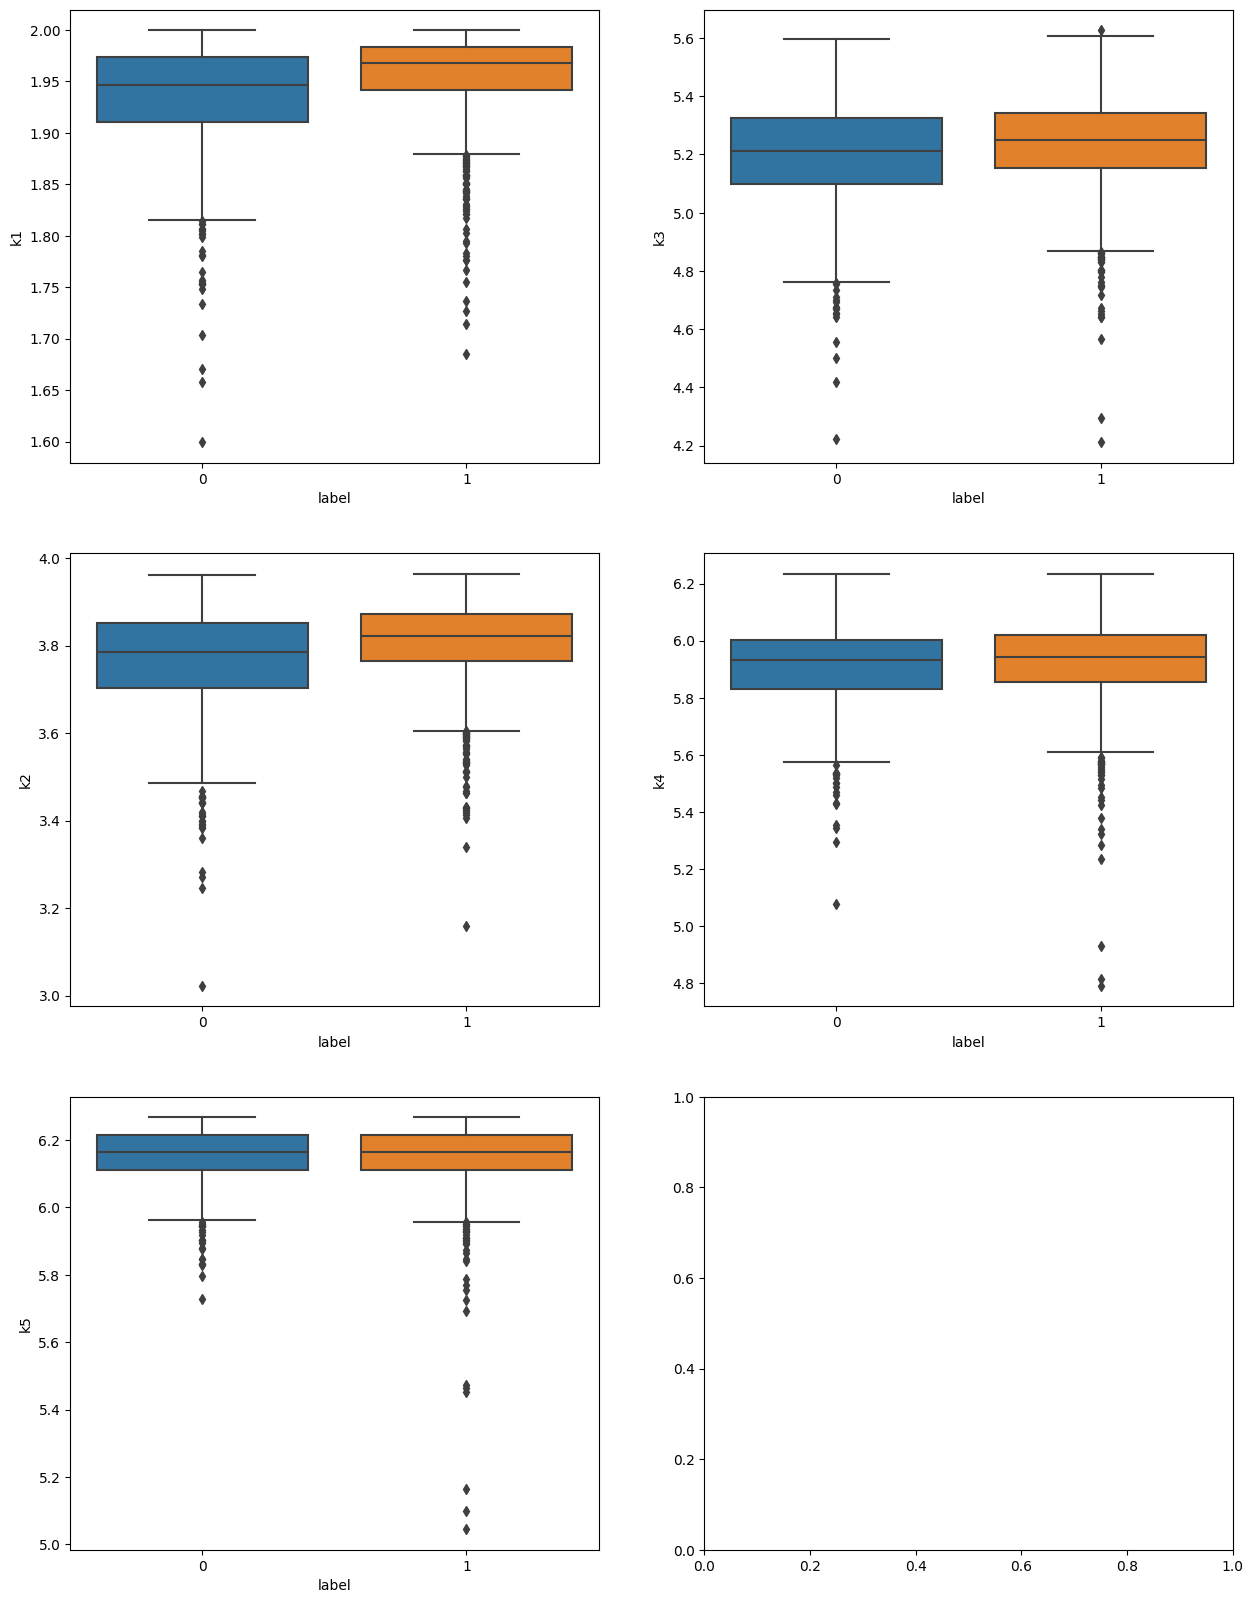

In [ ]:
plt.rcParams["figure.figsize"] = (15,20)

fig, axes = plt.subplots(3, 2)
sns.boxplot(data=SHA, y='k1', x='label', ax=axes[0,0])
sns.boxplot(data=SHA, y='k2', x='label', ax=axes[1,0])
sns.boxplot(data=SHA, y='k3', x='label', ax=axes[0,1])
sns.boxplot(data=SHA, y='k4', x='label', ax=axes[1,1])
sns.boxplot(data=SHA, y='k5', x='label', ax=axes[2,0])
plt.show()

Apesar de todas as caixas apresentarem uma boa simetria, muitos valores ficam pra
foras dos bigodes em todos os k’s

In [ ]:
# Entendendo o quanto de cada atributo corresponde a outliers
column_name = SHA.columns

print("Porcentagem de Outlier's:\n")

for i in range(len(column_name)-1):
    Q1 = SHA[column_name[i]].quantile(0.25)
    Q3 = SHA[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Matrizes booleanas indicando as linhas com outliers
    upper_array = np.where(SHA[column_name[i]]>=upper)[0]
    lower_array = np.where(SHA[column_name[i]]<=lower)[0]

    print(column_name[i] + ": ", (len(upper_array) + len(lower_array))/len(SHA) * 100)

Porcentagem de Outlier's:

k1:  4.577300326950024
k2:  3.7832788416627747
k3:  2.1018215787015415
k4:  2.5221858944418494
k5:  2.6156001868285848


In [ ]:
# substituindo os Outlier's pela média dos valores

SHA = pd.DataFrame(impute_outliers_IQR(SHA), columns = column_name)

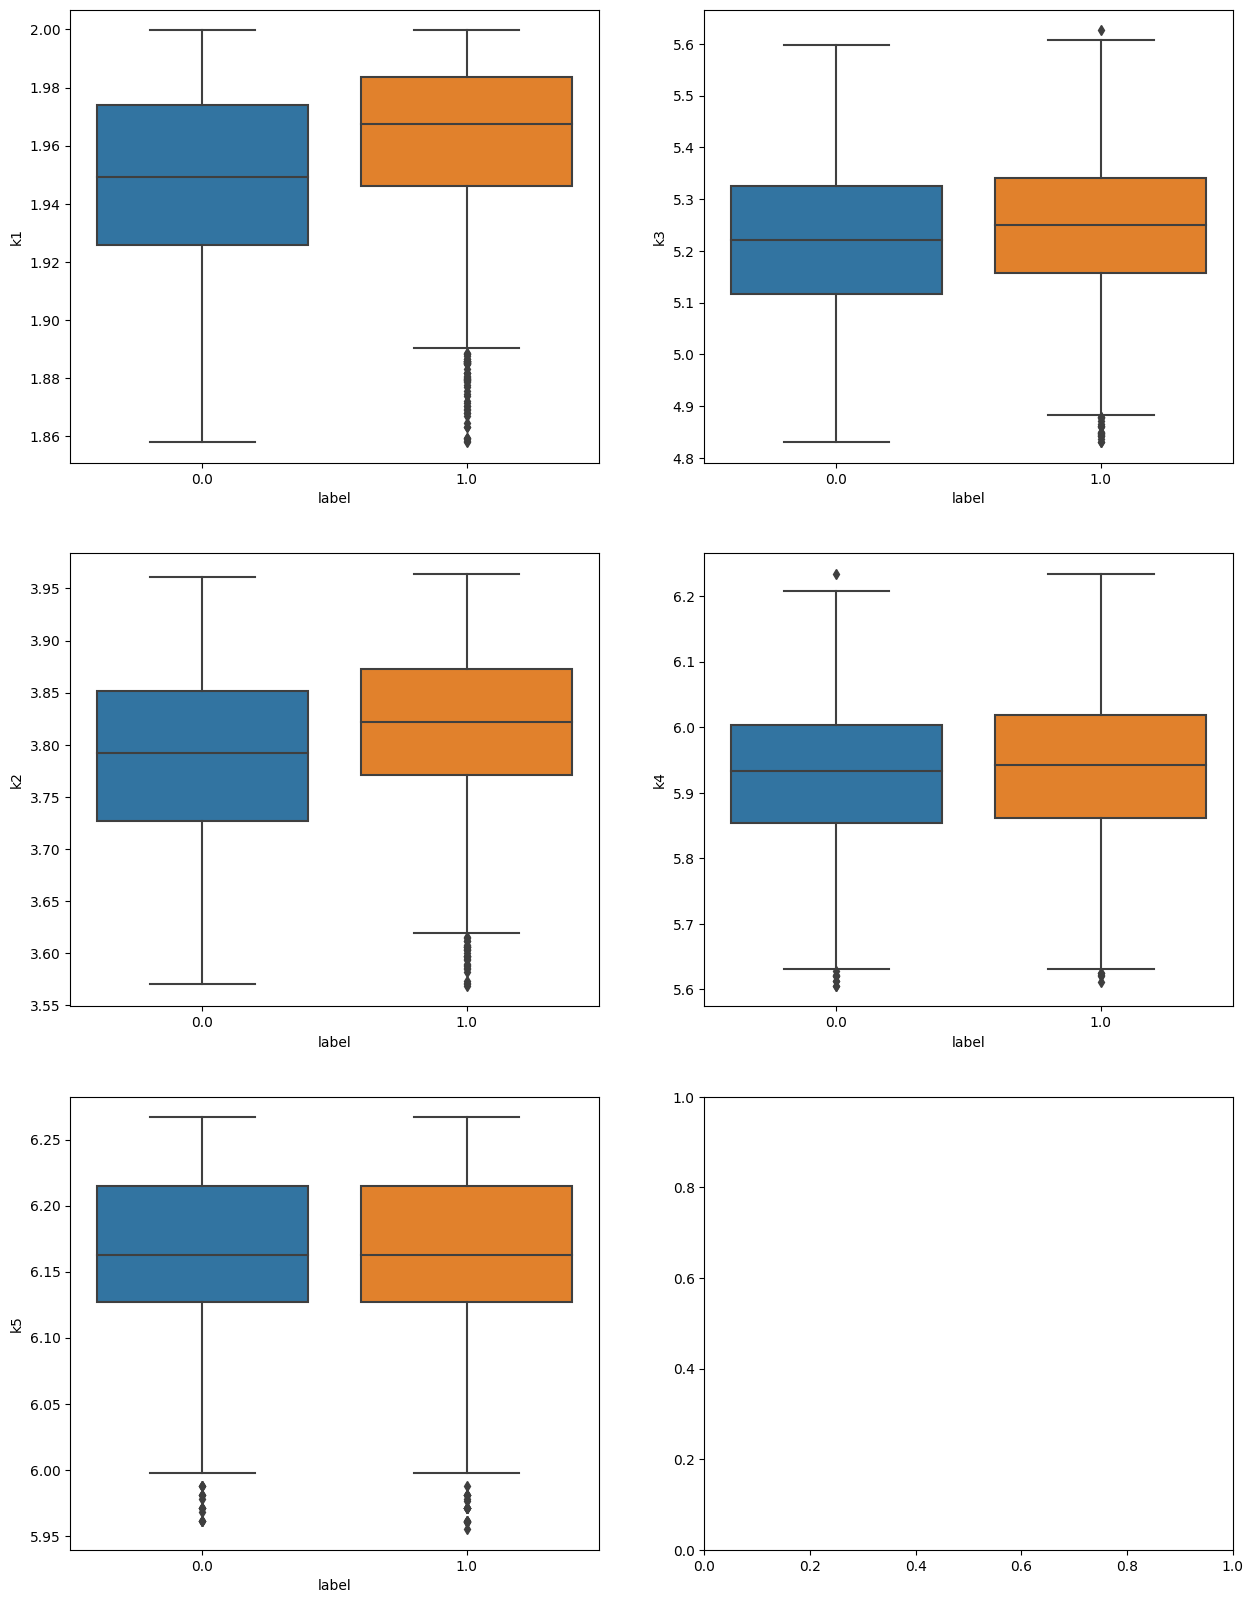

In [ ]:
plt.rcParams["figure.figsize"] = (15,20)

fig, axes = plt.subplots(3, 2)
sns.boxplot(data=SHA, y='k1', x='label', ax=axes[0,0])
sns.boxplot(data=SHA, y='k2', x='label', ax=axes[1,0])
sns.boxplot(data=SHA, y='k3', x='label', ax=axes[0,1])
sns.boxplot(data=SHA, y='k4', x='label', ax=axes[1,1])
sns.boxplot(data=SHA, y='k5', x='label', ax=axes[2,0])
plt.show()

# Demais passos do ML

Vamos criar aqui os dados para serem treinados, sendo que será como métrica avaliadora a **acurácia balanceada**, pois os dados são desbalanceados.

Nesse caso para a característica **NAC**

In [ ]:
names = ['A','T','C','G']
X = NAC[names]
y = NAC['label']

scoring = {'ACC_B': 'balanced_accuracy'}

Nessa etapa será definido as funções que gerem nosso pepiline sendo elas:


> pepiline:
recebe o modelo e os dados de treinamento, realiza uma padronização dos dados para em seguida faz uma valiação cruzada e retorna a acurácia balanceada, dado o treinamento.

>better_model:
avalia qual modelo teve a maior performance e retorna esse modelo treinado e um indice que orienta qual foi escolhido.

>make_trees:
dado o modelo de entrada cria uma figura com a arvore de decisão criada pelo modelo.

>make_shap:
criar uma figura, baseado na teoria de shap values, que fornece uma interpretabilidade sobre o modelo.


In [ ]:
def pepiline(model,name, X,y,score):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    scores = cross_validate(model, X, y, cv=kfold, scoring=score)
    acc = round(scores['test_ACC_B'].mean(),3)
    print(f'Classificador {name} performou {acc} de acurácia balanceada')
    return acc

def better_model(modelos, X,y, scoring):
  metricas = []
  print('Para as três primeiras preditoras as performances por modelos são:')
  for i in modelos:
      metricas.append(pepiline(i[0], i[1], X, y, scoring))

  maxi = metricas.index(max(metricas)) #Encontra o modelo com maior performance
  print('')
  print(f'O melhor modelo foi {modelos[maxi][1]} com {metricas[maxi]} de acurácia')

  model = modelos[maxi][0]
  model.fit(X, y)
  return model, maxi

def make_trees(model):
  # Extrair uma das árvores da floresta, caso necessário
  if maxi == 1:
      # Extrair uma das árvores da floresta
      tree = model.estimators_[0]
  else:
    tree = model

  # Plotar a árvore de decisão
  fig = plt.figure(figsize=(16, 6))
  _ = plot_tree(tree, feature_names=names, class_names=['p', 'n-p'], filled=True)
  plt.show()

def make_shap(model, X):
  # Calcular os valores SHAP
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)

  class_names = ['n-p', 'p']

  # Plotar os valores SHAP individualmente para cada classe
  for class_idx in range(1):
      shap.summary_plot(shap_values[class_idx], X, plot_type='dot', class_names=class_names, show=False)

      # Personalizar o gráfico com legendas, títulos e outros elementos
      plt.title('Valores SHAP - Tipo Dot')
      plt.xlabel('Valor SHAP')
      plt.ylabel('Características')
      plt.legend(labels=class_names)  # Adicionar as legendas das classes
      plt.show()

Vamos aqui armazenar os modelos estudados, será escolhido dois modelos baseados em árvores, dado a sua interpretabilidade, sendo eles a arvore de decisão e floresta aleatória, além da regressão logística, pela binaridade das respostas.

In [ ]:
tree_3 = [DecisionTreeClassifier(max_depth=len(names)-1),'Arvore de decisão']
ran_for = [RandomForestClassifier(max_depth=len(names)-1, n_estimators=20),'Floresta aleatória']
logreg = [LogisticRegression(), 'Regressão Logística']

modelos = [tree_3, ran_for, logreg]

model, maxi = better_model(modelos,X,y,scoring)

Para as três primeiras preditoras as performances por modelos são:
Classificador Arvore de decisão performou 0.681 de acurácia balanceada
Classificador Floresta aleatória performou 0.702 de acurácia balanceada
Classificador Regressão Logística performou 0.696 de acurácia balanceada

O melhor modelo foi Floresta aleatória com 0.702 de acurácia


Os melhores modelos variam entre RF e RL, com acurácias por volta de 70%.

Vamos isolar os modelos de arvore por um momento para ver sua capacidade de interpretabilidade.

Adiante, iremos chamar a arvore gerada de 'arvore NAC'.

Para as três primeiras preditoras as performances por modelos são:
Classificador Arvore de decisão performou 0.686 de acurácia balanceada
Classificador Floresta aleatória performou 0.695 de acurácia balanceada

O melhor modelo foi Floresta aleatória com 0.695 de acurácia


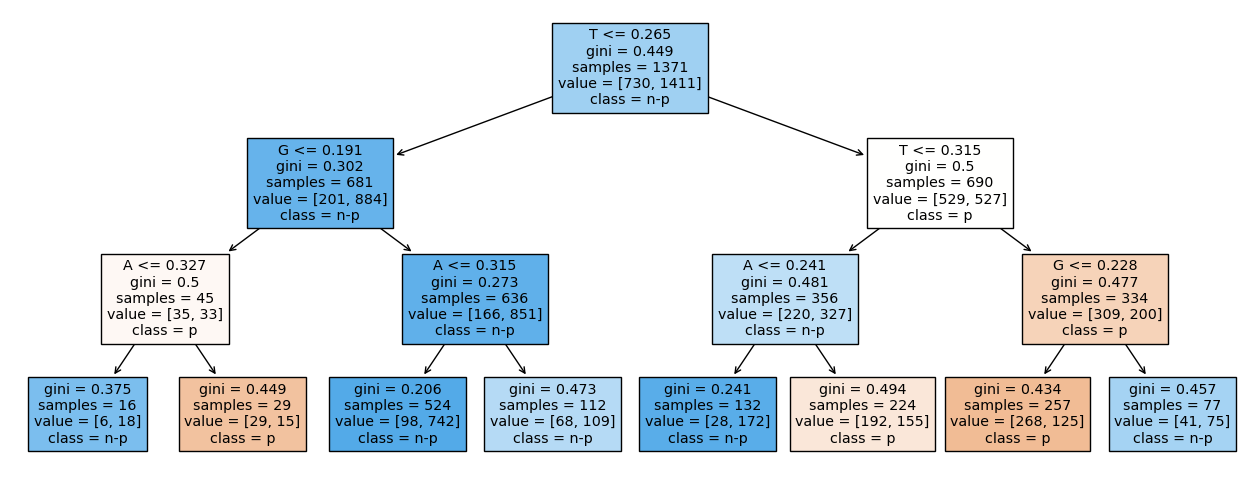

In [ ]:
modelos = [tree_3, ran_for]
model, maxi = better_model(modelos,X,y,scoring)
make_trees(model)

Vamos discutir sobre a figura 'dot' do shap values e como interpretar ela.

- No eixo y esquerdo temos as características do modelo, cada uma em uma linha, sendo que decresce na importância para a classificação final.

- Cada ponto no gráfico é um ponto na amostra, que pode assumir da cor azul a vermelha, sendo vermelha u, valor alto para a característica em questão e azul um valor baixo para o mesmo.

- No eixo horizontal de legenda 'Valor SHAP' temos se a contribuição é positiva (a favor da classe promotor) ou negativa (a favor da classe não promotor).


Por fim, nesse tipo de gráfico podemos analisar se há um padrão entre valores altos para uma característica com uma dada classificação.

Nesse ponto, vamos chamar o gráfico de 'SHAP NAC'.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


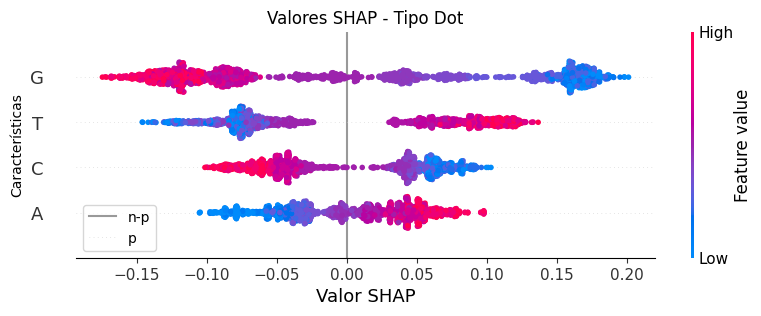

In [ ]:
make_shap(model, X)

Vemos por exemplo, que pode haver um padrão entre valores altos para a frequência de 'G' e a classificação como não promotor e o contrário também é verdade, valor baixo podem estar relacionados a classe promotor.

Olhemos para a característica **Shannon**:

In [ ]:
names = ['k1', 'k2', 'k3', 'k4', 'k5']
X = SHA[names]
y = SHA['label']

scoring = {'ACC_B': 'balanced_accuracy'}

Agora vamos fazer a comparação entre três modelos: árvores de decisão, floresta aleatória e regressão logística.

In [ ]:
tree_3 = [DecisionTreeClassifier(max_depth=len(names)-1),'Arvore de decisão']
ran_for = [RandomForestClassifier(max_depth=len(names)-1, n_estimators=20),'Floresta aleatória']
logreg = [LogisticRegression(), 'Regressão Logística']

modelos = [tree_3, ran_for, logreg]

model, maxi = better_model(modelos,X,y,scoring)

Para as três primeiras preditoras as performances por modelos são:
Classificador Arvore de decisão performou 0.528 de acurácia balanceada
Classificador Floresta aleatória performou 0.525 de acurácia balanceada
Classificador Regressão Logística performou 0.539 de acurácia balanceada

O melhor modelo foi Regressão Logística com 0.539 de acurácia


E finalmente para a **Fickett**:

In [ ]:
names =['fickett_score-ORF','fickett_score-full-sequence']
X = FIC[names]
y = FIC['label']

scoring = {'ACC_B': 'balanced_accuracy'}

In [ ]:
tree_3 = [DecisionTreeClassifier(max_depth=len(names)-1),'Arvore de decisão']
ran_for = [RandomForestClassifier(max_depth=len(names)-1, n_estimators=20),'Floresta aleatória']
logreg = [LogisticRegression(), 'Regressão Logística']

modelos = [tree_3, ran_for, logreg]

model, maxi = better_model(modelos,X,y,scoring)

Para as três primeiras preditoras as performances por modelos são:
Classificador Arvore de decisão performou 0.5 de acurácia balanceada
Classificador Floresta aleatória performou 0.502 de acurácia balanceada
Classificador Regressão Logística performou 0.583 de acurácia balanceada

O melhor modelo foi Regressão Logística com 0.583 de acurácia


Vamos utilizar todas as características para analisar o resultado.

In [ ]:
NAC1 = pd.read_csv('/content/drive/MyDrive/AM/NAC_DNA1.csv')
NAC2 = pd.read_csv('/content/drive/MyDrive/AM/NAC_DNA2.csv')
NAC = pd.concat([NAC1, NAC2])

FIC1 = pd.read_csv('/content/drive/MyDrive/AM/Fickett_DNA1.csv')
FIC2 = pd.read_csv('/content/drive/MyDrive/AM/Fickett_DNA2.csv')
FIC = pd.concat([FIC1, FIC2])

SHA1 = pd.read_csv('/content/drive/MyDrive/AM/Shannon_DNA1.csv')
SHA2 = pd.read_csv('/content/drive/MyDrive/AM/Shannon_DNA2.csv')
SHA = pd.concat([SHA1, SHA2])

In [ ]:
merged_df = pd.merge(NAC, SHA, on='nameseq')
merged_df = pd.merge(merged_df, FIC, on='nameseq')
names = ['A', 'C', 'G', 'T', 'k1', 'k2', 'k3', 'k4', 'k5', 'fickett_score-ORF', 'fickett_score-full-sequence']

X = merged_df[names]
y = merged_df['label_x']
print(X)
scoring = {'ACC_B': 'balanced_accuracy'}

             A         C         G         T        k1        k2        k3  \
0     0.172840  0.259259  0.358025  0.209877  1.945900  3.813897  5.341260   
1     0.185185  0.246914  0.308642  0.259259  1.977171  3.878415  5.521826   
2     0.197531  0.283951  0.246914  0.271605  1.986912  3.884631  5.420560   
3     0.172840  0.222222  0.308642  0.296296  1.963342  3.791280  5.219619   
4     0.172840  0.259259  0.271605  0.296296  1.973329  3.876644  5.420560   
...        ...       ...       ...       ...       ...       ...       ...   
2136  0.271605  0.185185  0.209877  0.333333  1.962323  3.771651  5.115296   
2137  0.283951  0.185185  0.148148  0.382716  1.904728  3.734952  5.026970   
2138  0.283951  0.222222  0.209877  0.283951  1.986401  3.797697  5.170251   
2139  0.407407  0.135802  0.160494  0.296296  1.862522  3.591749  4.979688   
2140  0.333333  0.197531  0.234568  0.234568  1.971909  3.757246  5.051960   

            k4        k5  fickett_score-ORF  fickett_score-full

In [ ]:
tree_3 = [DecisionTreeClassifier(max_depth=len(names)-8),'Arvore de decisão']
ran_for = [RandomForestClassifier(max_depth=len(names)-8, n_estimators=20),'Floresta aleatória']
logreg = [LogisticRegression(), 'Regressão Logística']

modelos = [tree_3, ran_for, logreg]

model, maxi = better_model(modelos,X,y,scoring)

Para as três primeiras preditoras as performances por modelos são:
Classificador Arvore de decisão performou 0.676 de acurácia balanceada
Classificador Floresta aleatória performou 0.698 de acurácia balanceada
Classificador Regressão Logística performou 0.728 de acurácia balanceada

O melhor modelo foi Regressão Logística com 0.728 de acurácia


Vemos acima que tem a maior performance que todos os modelos individuais, o que mostra que a combinação de diferentes características pode agregar informação.

Vamos plotar a arvore desse modelo, chamando esse gráfico de 'arvore final'

Para as três primeiras preditoras as performances por modelos são:
Classificador Arvore de decisão performou 0.685 de acurácia balanceada
Classificador Floresta aleatória performou 0.69 de acurácia balanceada

O melhor modelo foi Floresta aleatória com 0.69 de acurácia


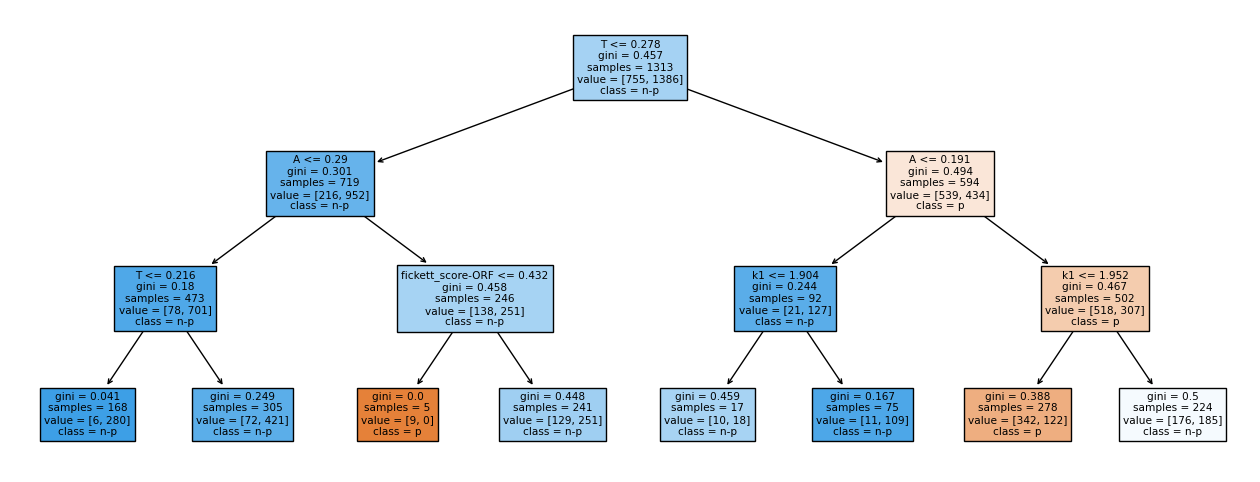

In [ ]:
modelos = [tree_3, ran_for]
model, maxi = better_model(modelos,X,y,scoring)
make_trees(model)

Por fim, no gráfico 'SHAP final' vemos que dentro as quatro principais características, três são da técnica NAC, o que aponta que seria a principal dentre as testadas.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


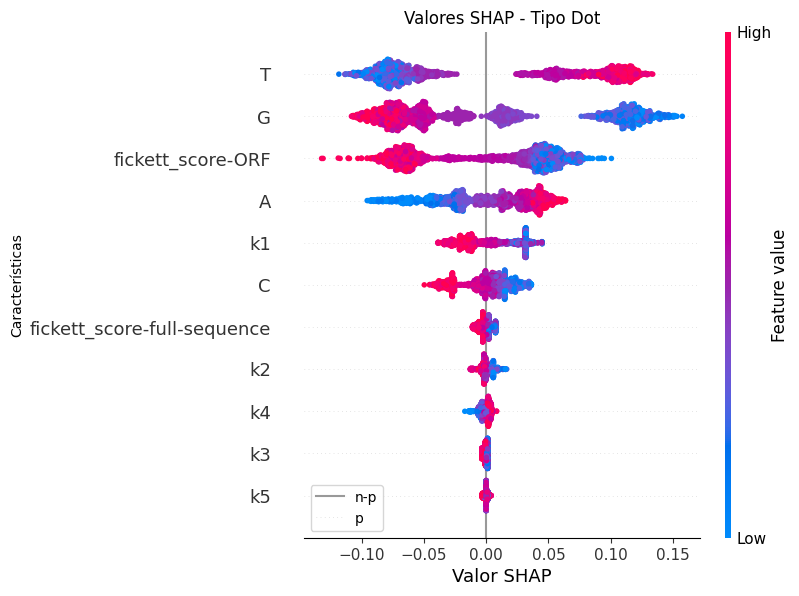

In [ ]:
make_shap(model, X)

# Referências:

[1] H. L. et al. Evolution of k-mer frequencies and entropy in duplication and
substitution mutation systems. IEEE Transactions on Information Theory,
2019.

[2] Mingyue, C. Le, and N. Kang. Microbiome big-data mining and applications
using single-cell technologies and metagenomics approaches toward precision
medicine. Frontiers in Genetics, 10, 2019.

[3] M. Khandelwal, R. K. Rout, and S. Umer. Protein-protein interaction prediction from primary sequences using supervised machine learning algorithm.

[4] Patel, T. Shukla, X. Huang, D. W. Ussery, and S. Wang. Machine learning
methods in drug discovery. Molecules, 25(22):5277, nov 2020.

[5] A. Shimazaki, D. Ueda, A. Choppin, H. Fujita, and K. Togashi. Deep
learning-based algorithm for lung cancer detection on chest radiographs using
the segmentation method. Scientific Reports, 12(1):727, jan 2022

[6] H. L. et al. Evolution of k-mer frequencies and entropy in duplication and
substitution mutation systems. IEEE Transactions on Information Theory,
2019.

[7] R. P. Bonidia, D. S. Domingues, D. S. Sanches, and A. C. P. L. F. de Car-
valho. Mathfeature: feature extraction package for dna, rna and protein
sequences based on mathematical descriptors. Briefings in Bioinformatics,
23(1):bbab434, 2022

[8] Robson P Bonidia and others, Feature extraction approaches for biological sequences: a comparative study of mathematical features, Briefings in Bioinformatics, Volume 22, Issue 5, September 2021, bbab011, https://doi.org/10.1093/bib/bbab011.

[9] FICKETT, James W.. Recognition of protein coding regions in DNA sequences. Nucleic Acids Research, v. 10, n. 17, p. 5303-5318, 1982. Oxford University Press (OUP). http://dx.doi.org/10.1093/nar/10.17.5303

[10] AKHTER, Sajia; BAILEY, Barbara A.; SALAMON, Peter; AZIZ, Ramy K.; EDWARDS, Robert A.. Applying Shannon's information theory to bacterial and phage genomes and metagenomes. Scientific Reports, v. 3, n. 1, 8 jan. 2013. Springer Science and Business Media LLC. http://dx.doi.org/10.1038/srep01033